<a href="https://colab.research.google.com/github/Haalibrahim/MiddleEast-COVID19/blob/master/Comprehensive_topic_modeling_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q numpy
!pip install -q pandas
!pip install -q gensim
!pip install -q pynndescent>=0.4
!pip install -q umap-learn
!pip install -q hdbscan
!pip install -q wordcloud
!pip install -q tensorflow
!pip install -q tensorflow_hub
!pip install -q tensorflow_text
!pip install -q torch
!pip install -q sentence_transformers
!pip install -q hnswlib
!pip install -q joblib<1.0.0
!pip install -q wordcloud

     |████████████████████████████████| 81kB 3.4MB/s 
     |████████████████████████████████| 6.4MB 4.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.4MB 4.2MB/s 
     |████████████████████████████████| 81kB 3.6MB/s 
     |████████████████████████████████| 2.1MB 7.8MB/s 
     |████████████████████████████████| 1.2MB 40.5MB/s 
     |████████████████████████████████| 3.3MB 41.1MB/s 
     |████████████████████████████████| 901kB 41.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
/bin/bash: 1.0.0: No such file or directory


In [2]:
!pip install -q top2vec[sentence_transformers]

ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [4]:
import pandas as pd
from copy import deepcopy
from top2vec import Top2Vec

In [5]:
import numpy as np

In [6]:
df = pd.read_excel('Abstracts1.xlsx')

In [7]:
df.head(5)

Abstract
0  BACKGROUND: In December 2019, COVID-19 broke o...
1  BACKGROUND: The recent coronavirus disease (CO...
2  Hamad General Hospital Anticoagulation Clinic ...
3  In December 2019, a cluster of atypical Pneumo...
4  Since the outbreak of the COVID-19 pandemic, m...

In [8]:
docs= list(df.loc[:, "Abstract"].values)

In [9]:
docs[:3]

['BACKGROUND: In December 2019, COVID-19 broke out in Wuhan, China, leading to national and international disruptions in health care, business, education, transportation, and nearly every aspect of our daily lives. Artificial intelligence (AI) has been leveraged amid the COVID-19 pandemic; however, little is known about its use for supporting public health efforts. OBJECTIVE: This scoping review aims to explore how AI technology is being used during the COVID-19 pandemic, as reported in the literature. Thus, it is the first review that describes and summarizes features of the identified AI techniques and data sets used for their development and validation. METHODS: A scoping review was conducted following the guidelines of PRISMA-ScR (Preferred Reporting Items for Systematic Reviews and Meta-Analyses Extension for Scoping Reviews). We searched the most commonly used electronic databases (eg, MEDLINE, EMBASE, and PsycInfo) between April 10 and 12, 2020. These terms were selected based o

In [10]:
model=Top2Vec(docs, embedding_model='universal-sentence-encoder')

2021-05-11 15:48:21,837 - top2vec - INFO - Pre-processing documents for training
2021-05-11 15:48:23,098 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.
INFO:absl:Downloading https://tfhub.dev/google/universal-sentence-encoder/4: 800.00MB
INFO:absl:Downloaded https://tfhub.dev/google/universal-sentence-encoder/4, Total size: 987.47MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.
2021-05-11 15:48:49,957 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2021-05-11 15:48:52,393 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2021-05-11 15:49:11,542 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
20

In [11]:
model.get_num_topics()

7

In [16]:
topic_words, word_scores,topic_nums = model.get_topics(7)

In [17]:
model.get_topics()

(array([['sars', 'interferon', 'antiviral', 'influenza', 'asymptomatic',
         'pandemic', 'outbreak', 'viral', 'outbreaks', 'quarantine',
         'pneumonia', 'patients', 'antibodies', 'vaccine', 'epidemics',
         'cohort', 'pandemics', 'vaccination', 'diagnosed',
         'hospitalized', 'epidemic', 'vaccines', 'icu', 'pubmed',
         'prevalence', 'pcr', 'epidemiology', 'respiratory',
         'populations', 'infectious', 'viruses', 'affected',
         'epidemiological', 'observed', 'symptomatic', 'immunity',
         'diagnostic', 'illness', 'disease', 'conclusions', 'pulmonary',
         'immune', 'syndrome', 'diseases', 'rna', 'hospitalization',
         'diagnosis', 'predictors', 'risks', 'morbidity'],
        ['respondents', 'antiviral', 'cohort', 'outbreak', 'outbreaks',
         'epidemiological', 'pandemic', 'epidemiology', 'sars',
         'prevalence', 'epidemic', 'asymptomatic', 'questionnaire',
         'participants', 'predictors', 'vaccination', 'pcr', 'quar

In [19]:
model.get_topics(1)

(array([['sars', 'interferon', 'antiviral', 'influenza', 'asymptomatic',
         'pandemic', 'outbreak', 'viral', 'outbreaks', 'quarantine',
         'pneumonia', 'patients', 'antibodies', 'vaccine', 'epidemics',
         'cohort', 'pandemics', 'vaccination', 'diagnosed',
         'hospitalized', 'epidemic', 'vaccines', 'icu', 'pubmed',
         'prevalence', 'pcr', 'epidemiology', 'respiratory',
         'populations', 'infectious', 'viruses', 'affected',
         'epidemiological', 'observed', 'symptomatic', 'immunity',
         'diagnostic', 'illness', 'disease', 'conclusions', 'pulmonary',
         'immune', 'syndrome', 'diseases', 'rna', 'hospitalization',
         'diagnosis', 'predictors', 'risks', 'morbidity']], dtype='<U15'),
 array([[0.32486516, 0.27147147, 0.2696908 , 0.25444755, 0.2493149 ,
         0.24053589, 0.23509827, 0.23420373, 0.23318225, 0.21773304,
         0.21115825, 0.20627162, 0.20465171, 0.20315488, 0.20286536,
         0.19971919, 0.19556865, 0.19460917, 0.

In [21]:
model.get_topic_sizes()

(array([622, 192, 191, 172, 140, 127,  75]), array([0, 1, 2, 3, 4, 5, 6]))

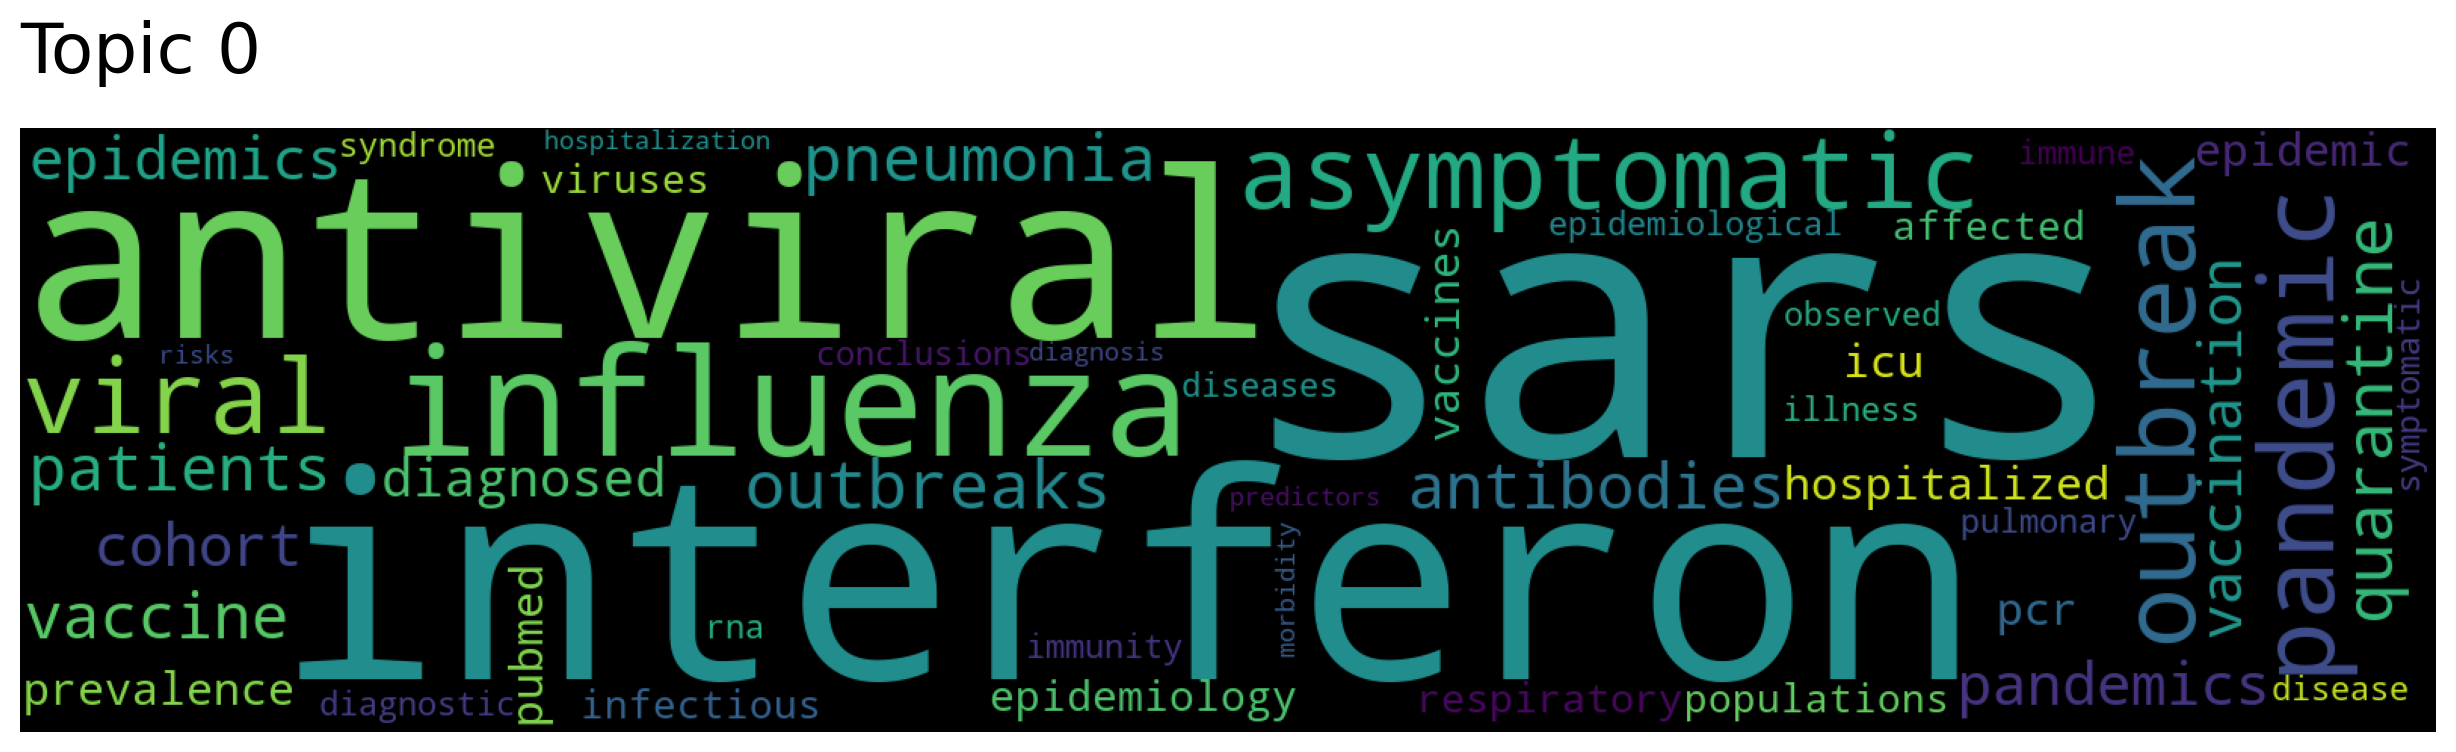

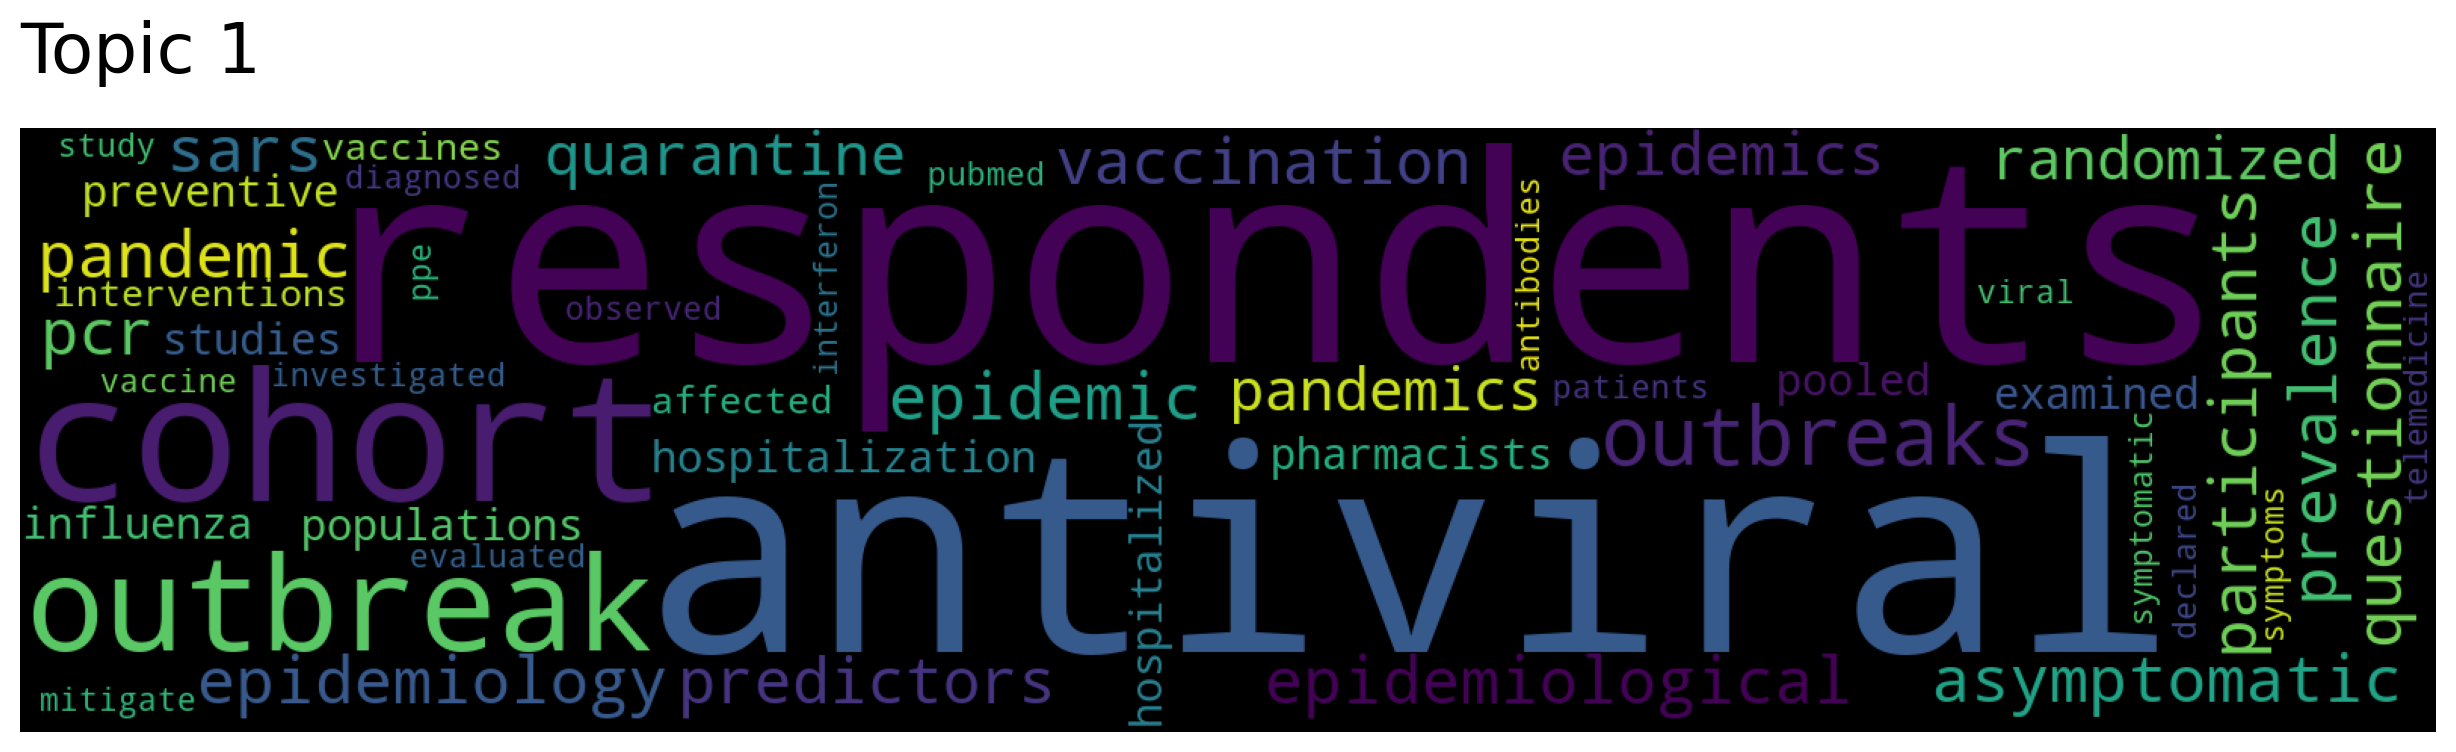

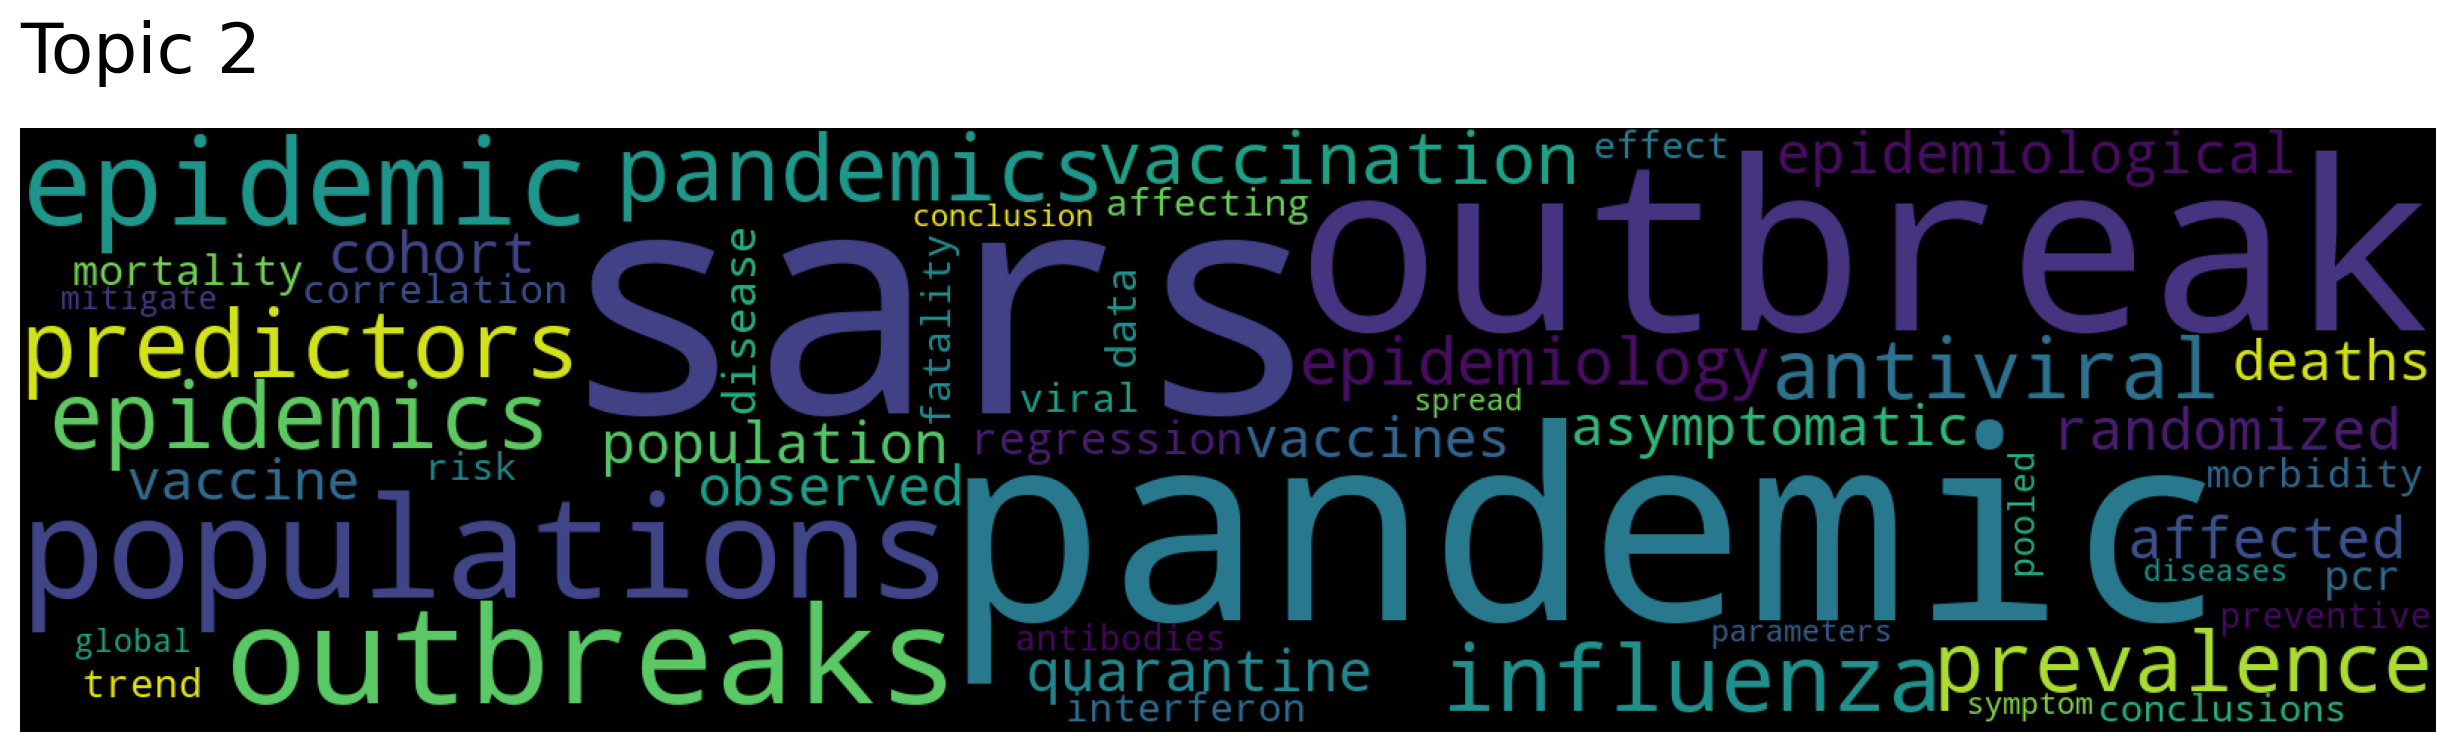

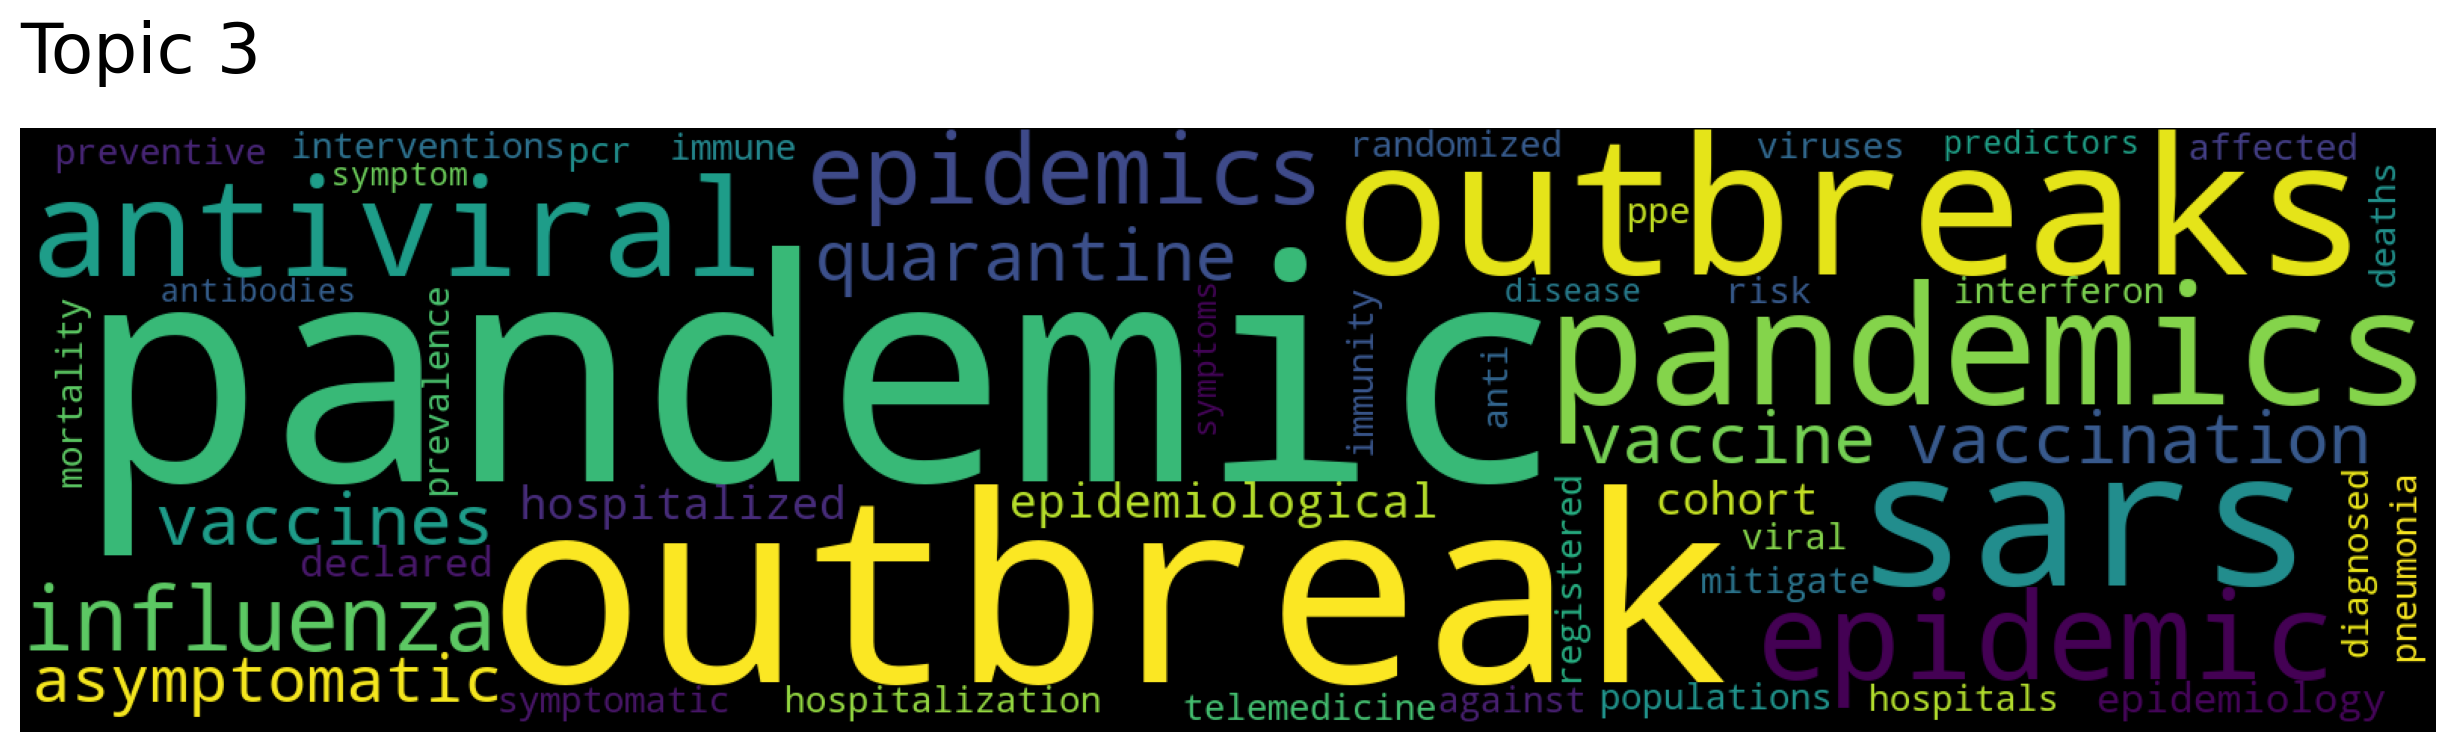

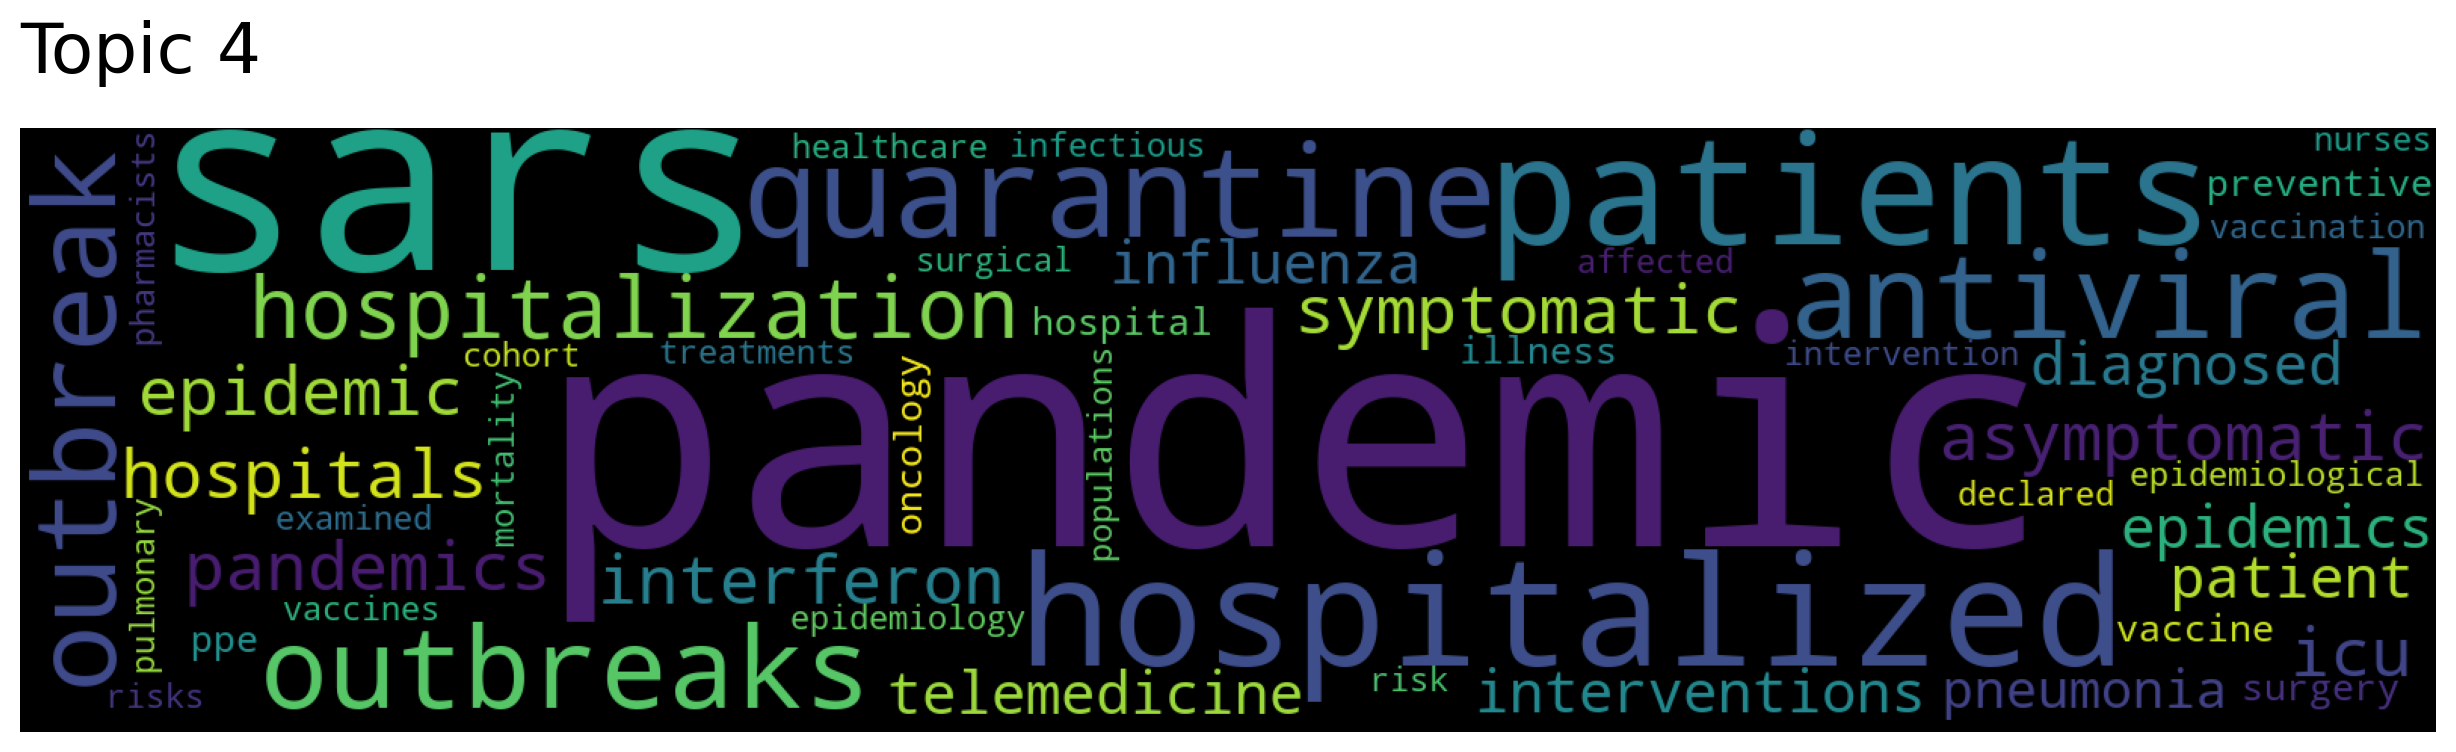

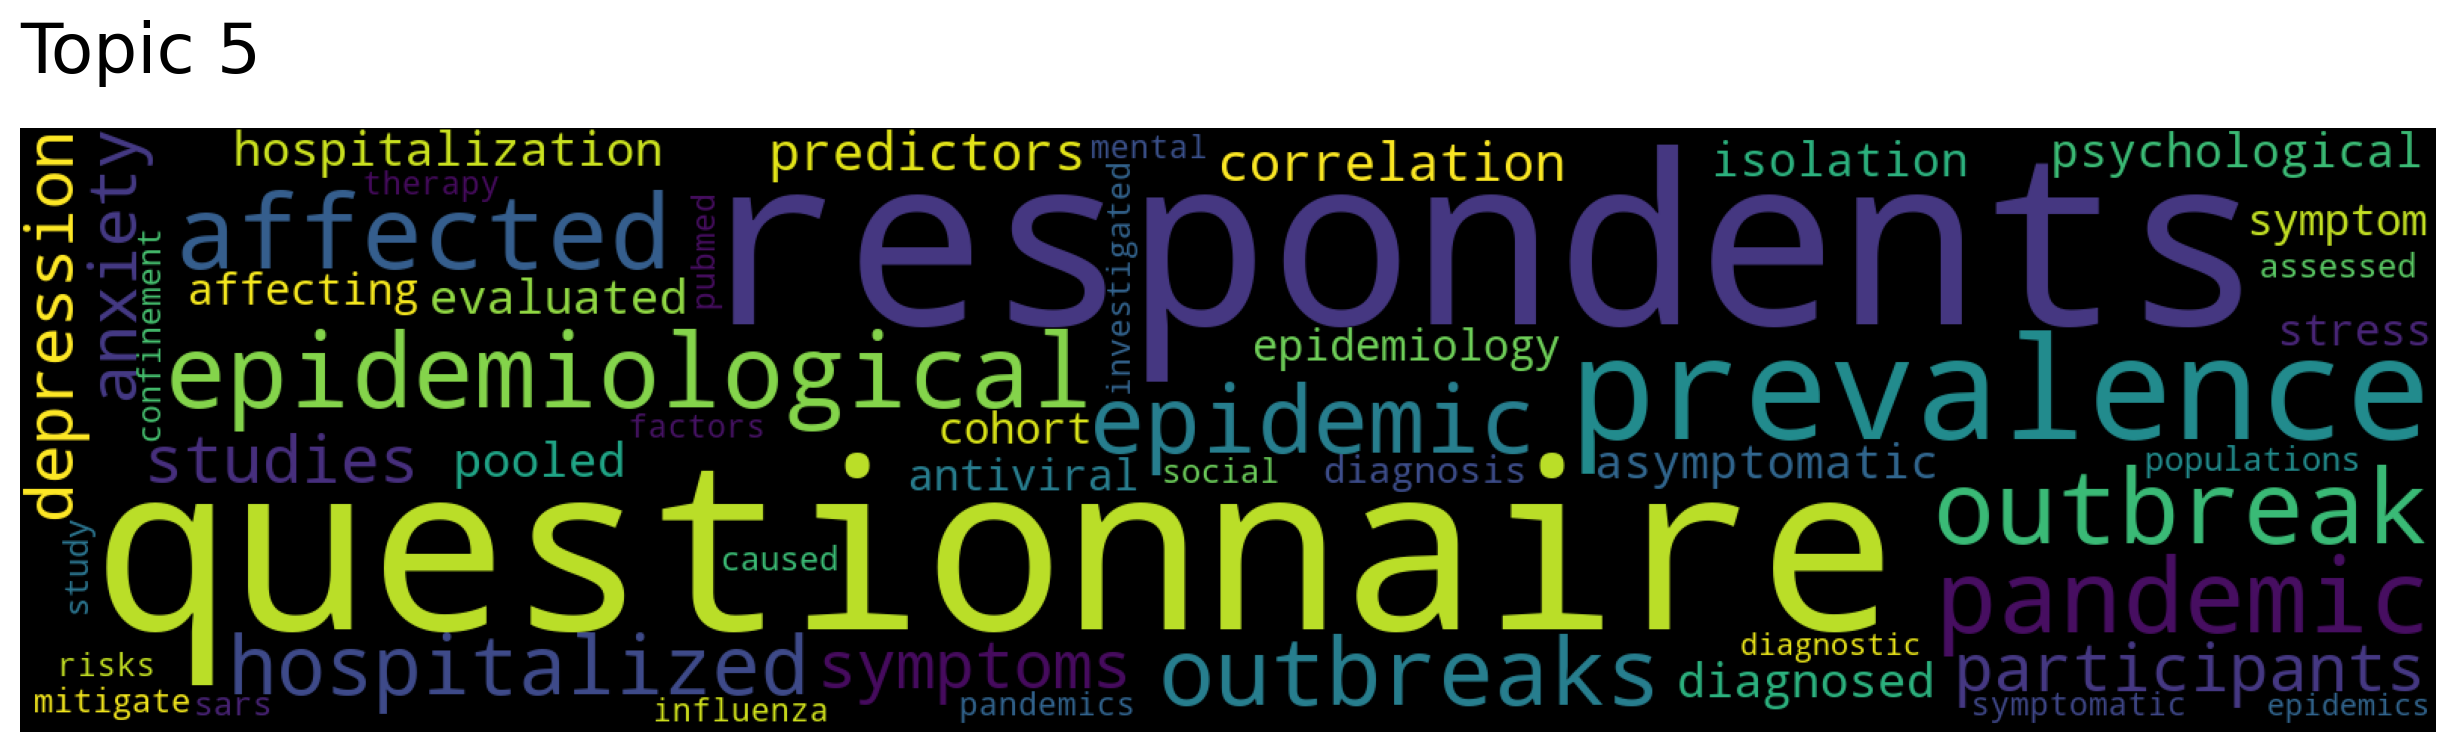

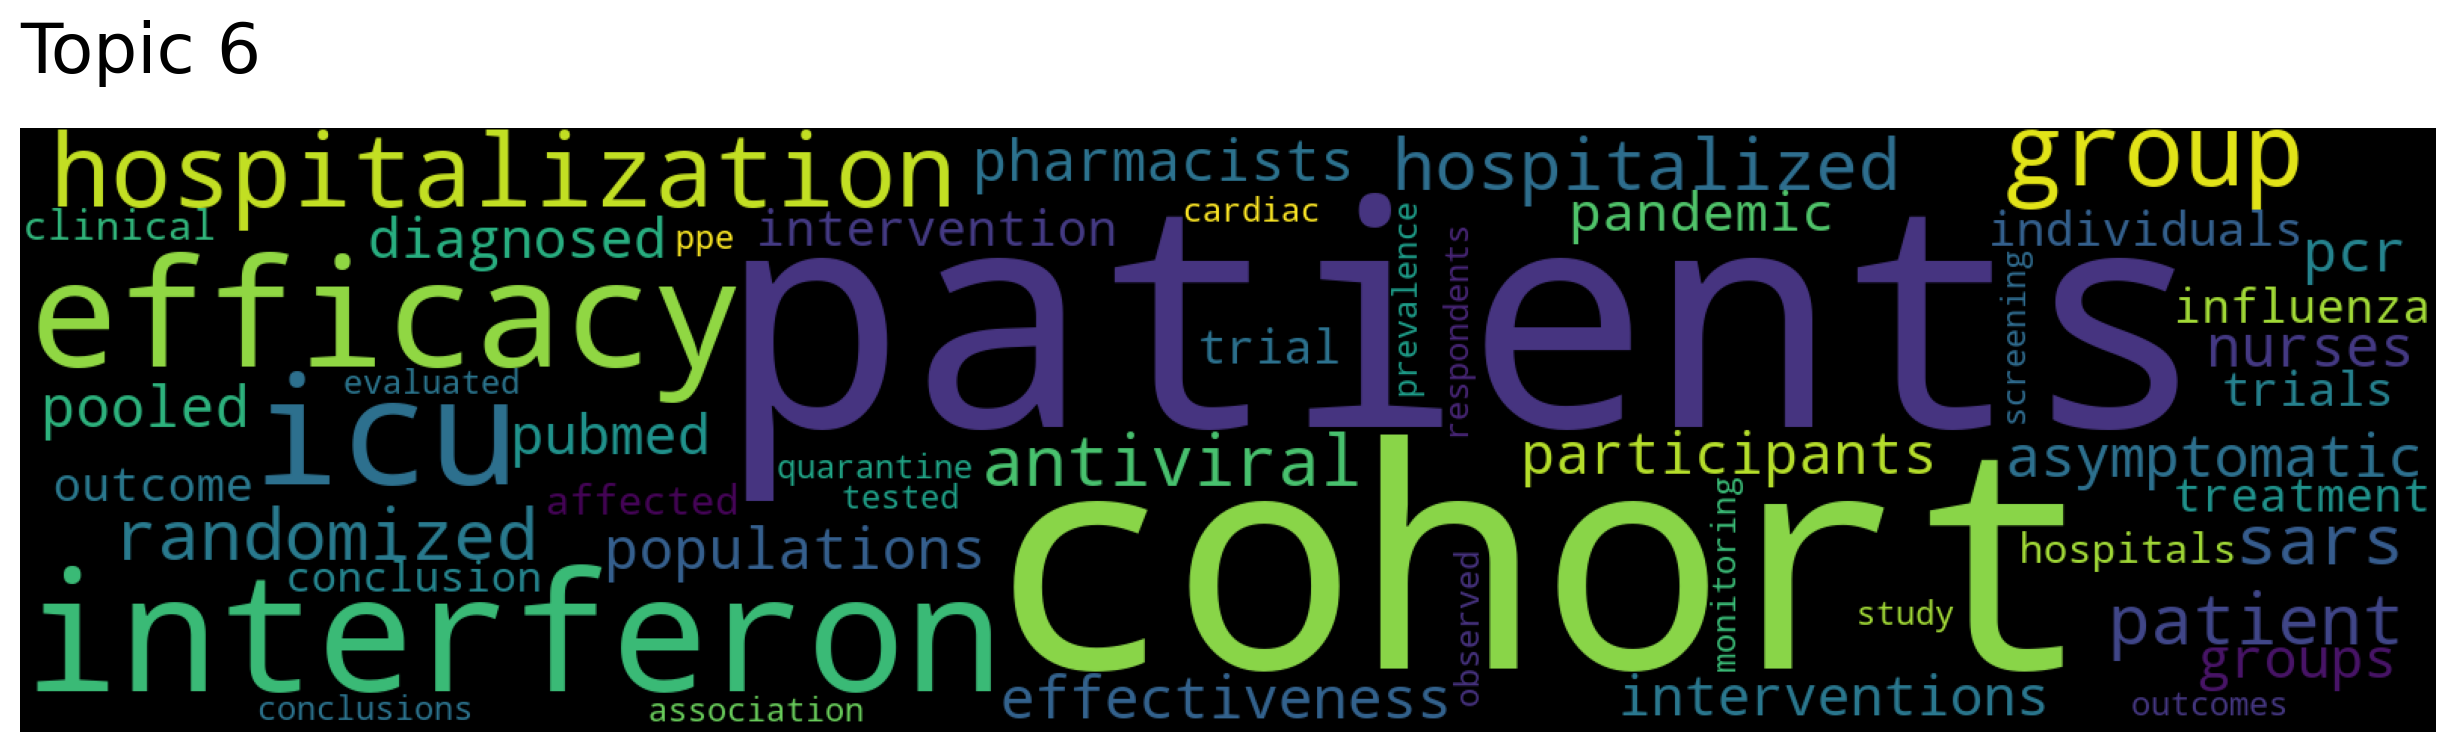

In [20]:
for topic in topic_nums:
  model.generate_topic_wordcloud(topic)

In [23]:
# Finding documents that are similar in the same theme:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=0, num_docs=10)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 1380, Score: 0.8341482281684875
-----------
PURPOSE: Coronavirus disease 2019 (COVID-19) is an ongoing infectious disease caused by the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) agent, and is generally known as novel coronavirus. The impact of the disease has had apparent effects on health, social, and economic levels. This study aimed to investigate the epidemiologic features, clinical presentations, laboratory examination, and outcomes of COVID-19 patients in Jordan. PATIENTS AND METHODS: This retrospective study included all COVID-19 patients admitted to the quarantine center at King Abdullah University Hospital in Jordan between March 16 and May 21, 2020. Patient information was abstracted from hospital electronic records and included patient demographics, symptoms, comorbidities, laboratory tests, infection period, and outcome. RESULTS: Approximately 42% of the quarantined individuals were asymptomatic. The majority of symptomatic patients had mild to 

In [24]:
# Searching for similar keywords
words, word_scores = model.similar_words(keywords=["vaccination"], keywords_neg=[], num_words=10)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

vaccine 0.844352086314335
vaccines 0.8235411300312416
influenza 0.48835162745074223
pandemics 0.4777439348814032
epidemics 0.46988062026379257
immune 0.4613425969968317
preventive 0.4588502063559059
immunity 0.45567243489388354
viral 0.44251952795000976
disease 0.4302216342317605


In [64]:
# Extracting key words from the abstracts
documents, document_scores, document_nums = model.search_documents_by_keywords(keywords=["coronavirus", "respiratory"], num_docs=7)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 1380, Score: 0.27682979527983387
-----------
During the pandemic caused by the novel coronavirus (COVID-19), lung ultrasound has been used to diagnose and monitor respiratory condition. The aim of the study was to describe lung ultrasound findings in children with a COVID-19 infection. Patients younger than 18 years old and positive for COVID-19, admitted to pediatric tertiary referral hospital were included. They were divided into two groups depending on the presence of respiratory symptoms. Lung ultrasound results were categorized into four degrees according to Soldati et al. score (J Ultrasound Med 39:1-7, 2020) and it was also described the presence and type of consolidation. Sixteen patients were recruited. The median age was 11 years old (IQR 2.8-12). Four children (25%) required admission to the intensive care unit. Six patients (37.5%) presented with respiratory symptoms. Most of them showed S.score of 2 and subpleural consolidations were observed in four cases (66.6%

In [62]:
print(doc)

No abstract. 


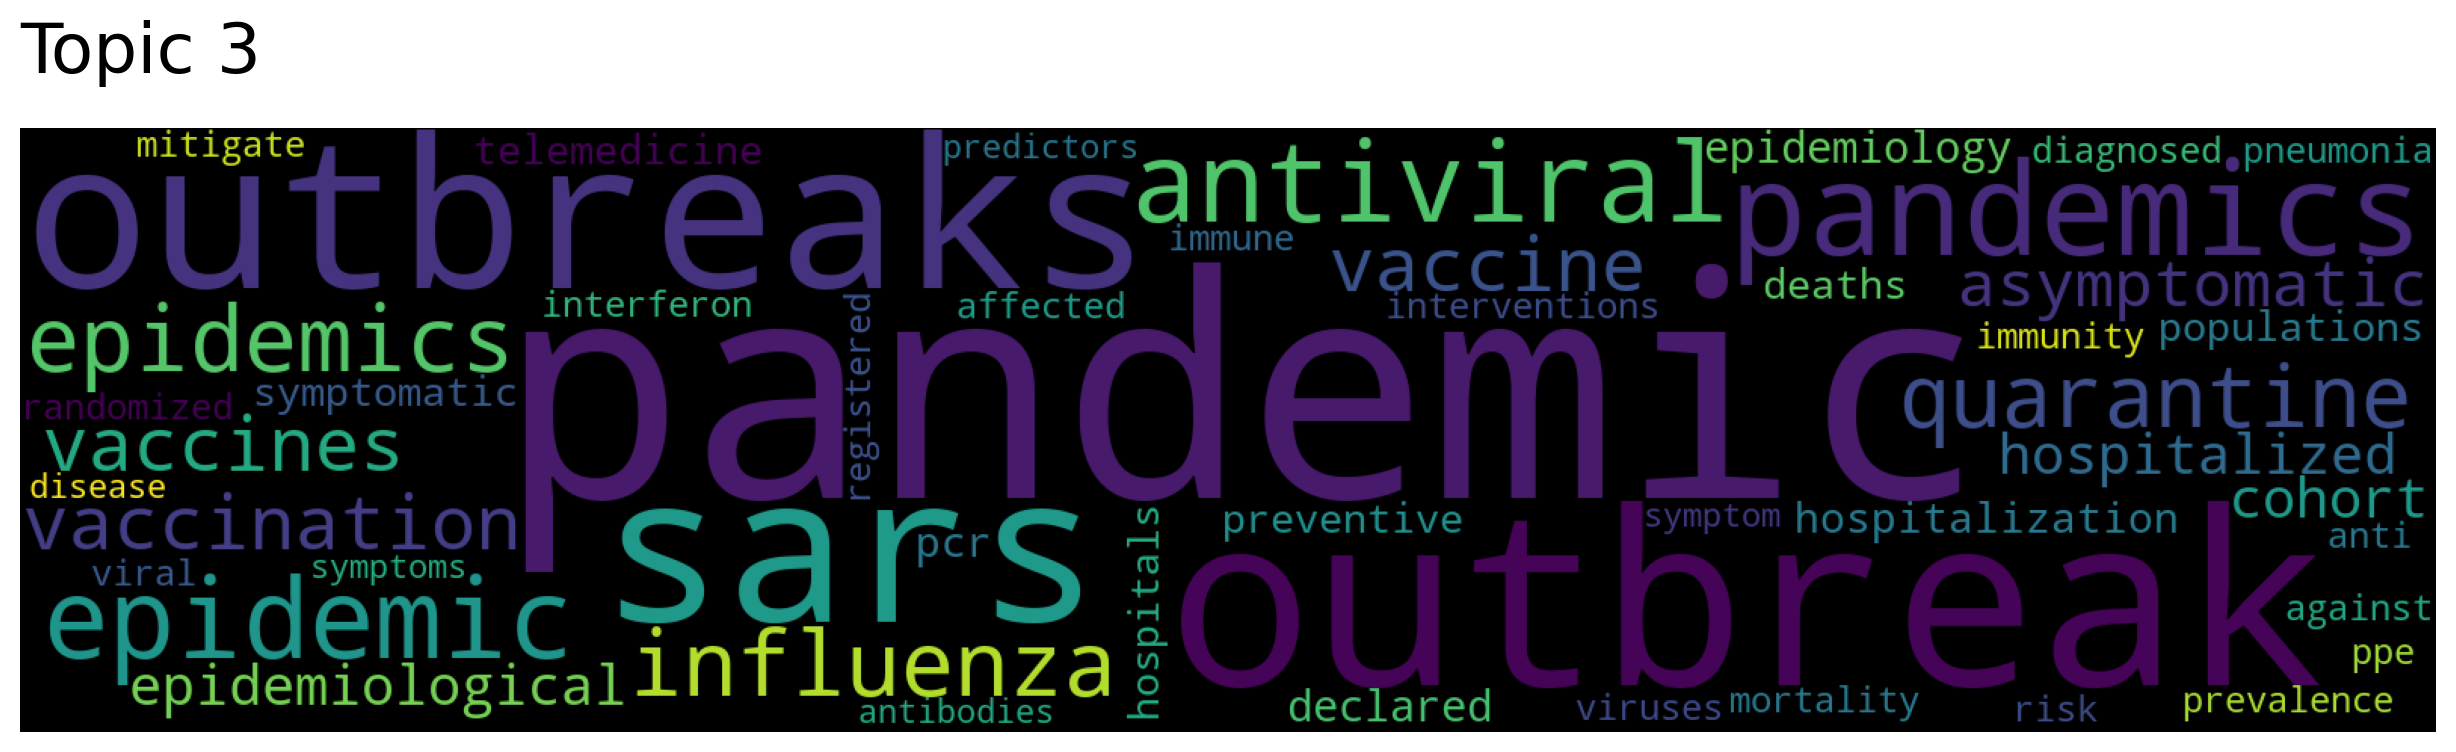

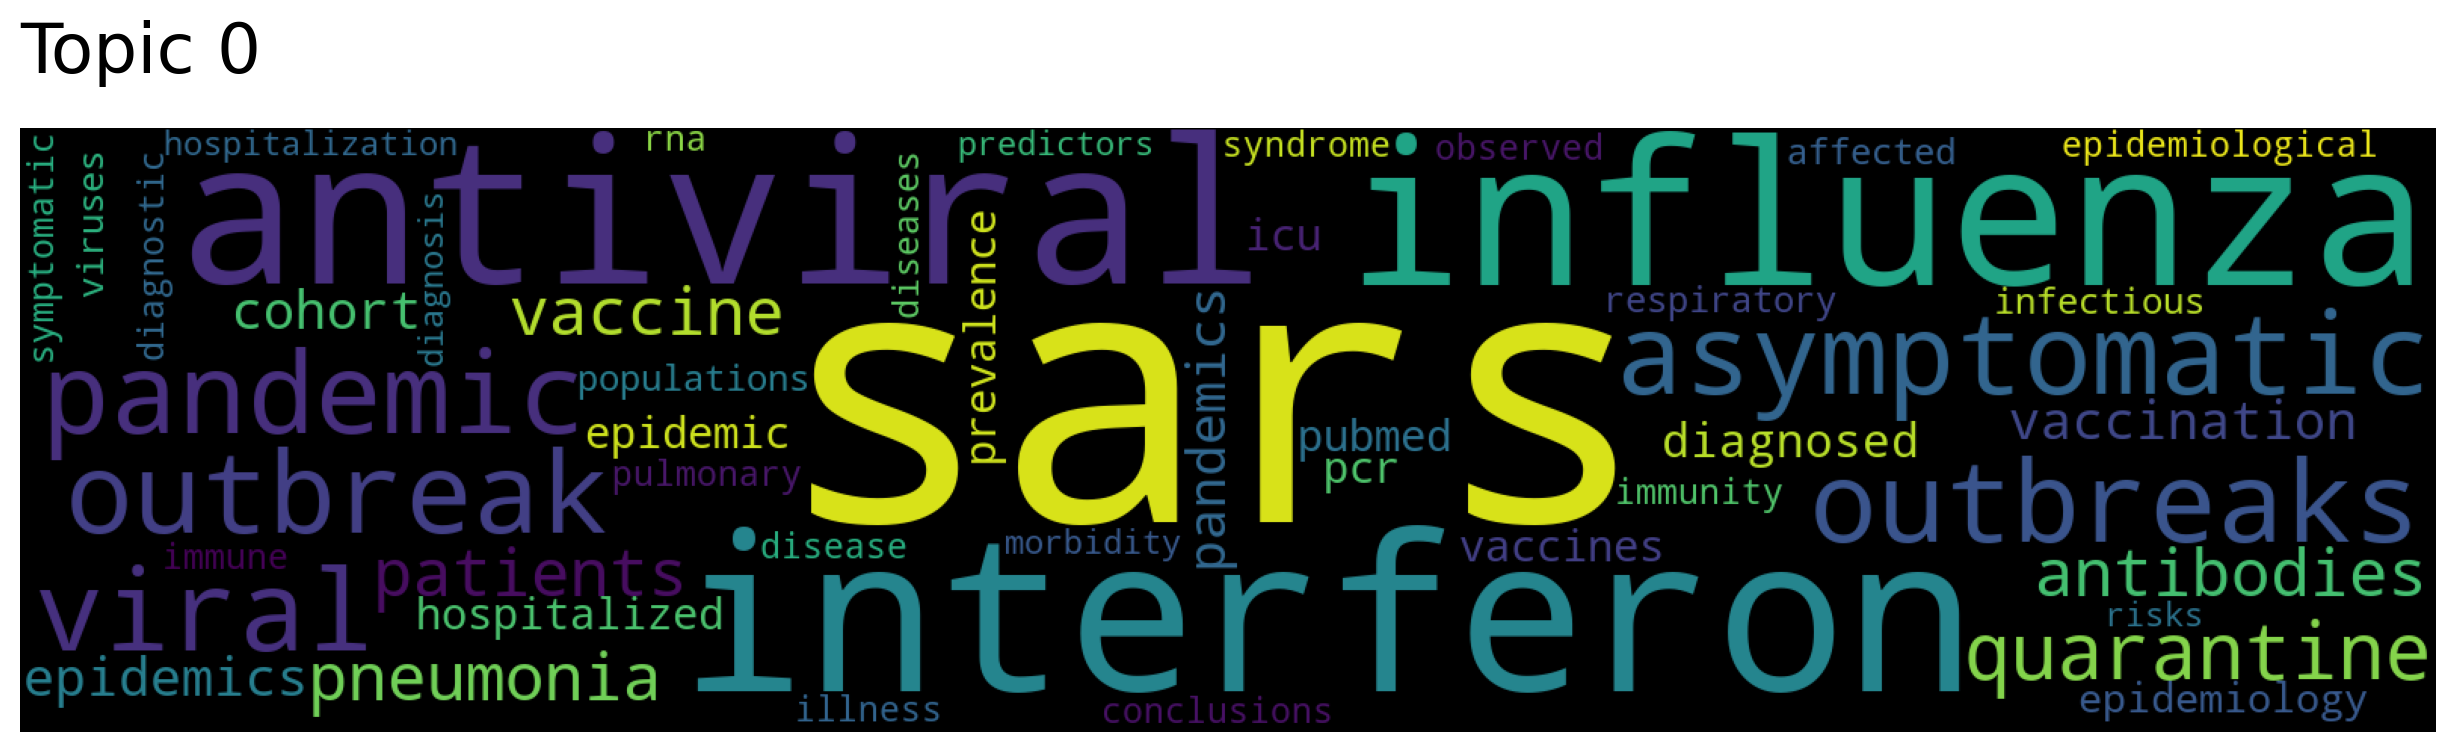

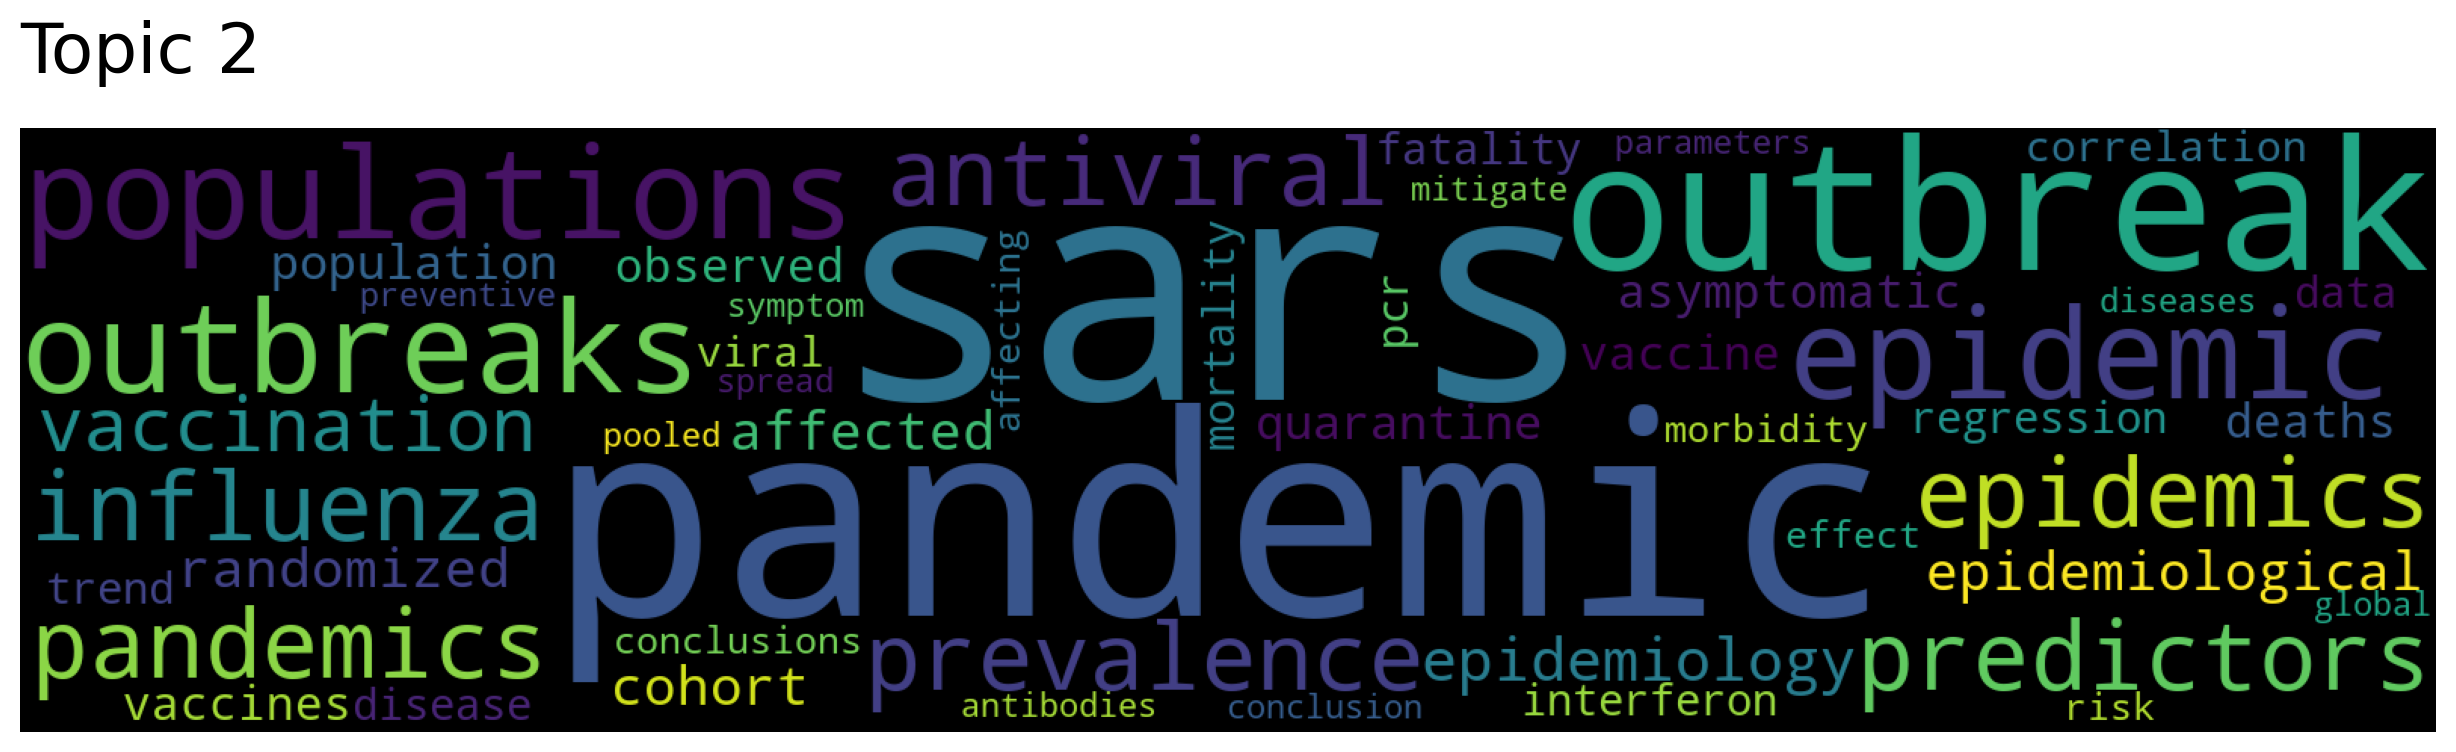

In [43]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["vaccine"],num_topics=3)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic, background_color="black")

In [44]:
words, word_scores = model.similar_words(keywords=["chloroquine"], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

ValueError: ignored

In [60]:
text = nltk.Text(words)
text.concordance('chloroquine', lines = 10)

Displaying 10 of 13 matches:
voidance should be considered for chloroquine , atazanavir , oseltamivir , riba
ealed that hydroxychloroquine and chloroquine are not only profitable but also 
d by different therapies based on chloroquine , hydroxychloroquine , and azithr
ected individuals . In addition , Chloroquine , which was previously used for m
omycin ) , hydroxychloroquine and chloroquine , colchicine , and prostaglandin 
146879 ( P426A ) , respectively . Chloroquine ( CQ ) and its metabolite hydroxy
 . Fifteen patients received both chloroquine and azithromycin . Fourteen patie
anced health security . In 2020 , chloroquine derivatives are among the drugs t
icacy . In the present work , the chloroquine and the chloroquine phosphate mol
nt work , the chloroquine and the chloroquine phosphate molecules have been pro


In [31]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [55]:
#Here i am trying to pull the sentences from the corpus
words= nltk.word_tokenize(str(docs))
fd=nltk.FreqDist(words)

In [52]:
words, word_scores = model.similar_words(keywords=["vaccine"], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

vaccination 0.8443519555357635
vaccines 0.8383734941364123
influenza 0.5082027581613544
immunity 0.505622161593676
pandemics 0.5031147487205989
viral 0.49178244697149676
immune 0.48138253326126457
epidemics 0.4757152094389231
outbreak 0.4577818513666625
outbreaks 0.4545839988649425
interferon 0.4524202153964184
spreading 0.4496123153434447
antibodies 0.4442702430839818
antiviral 0.4396384099643163
infectious 0.43380548929551277
quarantine 0.4218838162950308
disease 0.4190319032586346
sars 0.4147603157895555
preventive 0.41117556011395
diseases 0.40231150571214824


In [ ]:
doc = '''
During the pandemic caused by the novel coronavirus (COVID-19), lung ultrasound has been used to diagnose and monitor respiratory condition. The aim of the study was to describe lung ultrasound findings in children with a COVID-19 infection. Patients younger than 18 years old and positive for COVID-19, admitted to pediatric tertiary referral hospital were included. They were divided into two groups depending on the presence of respiratory symptoms. Lung ultrasound results were categorized into four degrees according to Soldati et al. score (J Ultrasound Med 39:1-7, 2020) and it was also described the presence and type of consolidation. Sixteen patients were recruited. The median age was 11 years old (IQR 2.8-12). Four children (25%) required admission to the intensive care unit. Six patients (37.5%) presented with respiratory symptoms. Most of them showed S.score of 2 and subpleural consolidations were observed in four cases (66.6%). Ten patients (62.5%) presented with non-respiratory symptoms, lung ultrasound showed S.score from 0 to 2. Three (30%) were diagnosed of multisystem inflammatory syndrome and lung ultrasounds showed S.score of 2 with bilateral pleural effusion.Conclusions: Children with COVID-19 and respiratory symptoms mostly showed a S.score of 2 and 3 with subpleural consolidations, upon the lung ultrasound assessment. What is Known: • Lung ultrasound is a useful tool for monitoring patients with respiratory symptoms in both adults and children. Lung ultrasounds are altered in adult patients with COVID-19. What is New: • Lung ultrasound might improve COVID-19 assessment, it could be a useful tool to diagnose and monitor patients throughout the COVID-19 pandemic. Even COVID-19 patients with non-respiratory symptoms have lung alterations that are visible on lung ultrasound. 

SARS-COV-2 has created one of the most massive pandemics in modern history. There is a rapid accumulation of data on its epidemiology, clinical course, diagnosis, management, and complications. One of the sequelae of COVID-19 pneumonia and acute respiratory distress syndrome (ARDS) is pulmonary fibrosis. There is a dearth of accurate data on the prevalence of pulmonary fibrosis post-COVID-19. We report a patient who developed dyspnea secondary to pulmonary fibrosis after successful treatment of COVID-19 pneumonia. 

Type I and type II pneumocytes are two forms of epithelial cells found lining the alveoli in the lungs. Type II pneumocytes exclusively secrete 'pulmonary surfactants,' a lipoprotein complex made up of 90% lipids (mainly phospholipids) and 10% surfactant proteins (SP-A, SP-B, SP-C, and SP-D). Respiratory diseases such as influenza, severe acute respiratory syndrome coronavirus infection, and severe acute respiratory syndrome coronavirus 2 infection are reported to preferentially attack type II pneumocytes of the lungs. After viral invasion, consequent viral propagation and destruction of type II pneumocytes causes altered surfactant production, resulting in dyspnea and acute respiratory distress syndrome in patients with coronavirus disease 2019. Exogenous animal-derived or synthetic pulmonary surfactant therapy has already shown immense success in the treatment of neonatal respiratory distress syndrome and has the potential to contribute efficiently toward repair of damaged alveoli and preventing severe acute respiratory syndrome coronavirus 2-associated respiratory failure. Furthermore, early detection of surfactant collectins (SP-A and SP-D) in the circulatory system can be a significant clinical marker for disease prognosis in the near future. 

Despite inconclusive evidence, chloroquine (CQ) and hydroxychloroquine (HCQ)are commonly used for the treatment of Corona virus Disease 2019(COVID-19) in critically ill patients.It was hypothesized that HCQ as an aerosol application can reach the antiviral concentration of ~1-5 μM in the alveolar cells which has been proven effective in vitro. A physiologically-based pharmacokinetic (PBPK) model of nebulized HCQ for pulmonary delivery to COVID-19 patients using the Nasal-Pulmonary Module in GastroPlus(®) V9.7 simulator, in order to calculate the necessary inhalation dose regimen of HCQ, was developed. The physiological, drug disposition, and pharmacokinetic parameters were obtained from the literature and used during model building after optimization using Optimization Module, while oral data was used for validation. The 25 mg BID inhalation dosing was predicted to lead to alveolar HCQ levels of 7 µM (above EC50 of ~1-5 µM), and small plasma levels of 0.18 µM (as compared to plasma levels of 3.22 µM after 200 mg BID oral dosing). However, average contact time (>1 µM) is around 0.5 h in lung parts, suggesting indirect exposure response effect of HCQ.The developed PBPK model herein predicted HCQ levels in plasma and different lung parts of adults after multiple inhalation dosing regimens for 5 days. This in-silico work needs to be tested in vivo on healthy subjects and COVID-19 patients using 12.5 mg BID and 25 mg BID inhalation doses. 

The recurrent zoonotic spillover of coronaviruses (CoVs) into the human population underscores the need for broadly active countermeasures. We employed a directed evolution approach to engineer three severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) antibodies for enhanced neutralization breadth and potency. One of the affinity-matured variants, ADG-2, displays strong binding activity to a large panel of sarbecovirus receptor binding domains and neutralizes representative epidemic sarbecoviruses with high potency. Structural and biochemical studies demonstrate that ADG-2 employs a distinct angle of approach to recognize a highly conserved epitope that overlaps the receptor binding site. In immunocompetent mouse models of SARS and COVID-19, prophylactic administration of ADG-2 provided complete protection against respiratory burden, viral replication in the lungs, and lung pathology. Altogether, ADG-2 represents a promising broad-spectrum therapeutic candidate against clade 1 sarbecoviruses. 

Transmission of respiratory viruses is a complex process involving emission, deposition in the airways, and infection. Inhalation is often the most relevant transmission mode in indoor environments. For severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2), the risk of inhalation transmission is not yet fully understood. Here, we used an indoor aerosol model combined with a regional inhaled deposited dose model to examine the indoor transport of aerosols from an infected person with novel coronavirus disease (COVID-19) to a susceptible person and assess the potential inhaled dose rate of particles. Two scenarios with different ventilation rates were compared, as well as adult female versus male recipients. Assuming a source strength of 10 viruses/s, in a tightly closed room with poor ventilation (0.5 h(-1)), the respiratory tract deposited dose rate was 140-350 and 100-260 inhaled viruses/hour for males and females; respectively. With ventilation at 3 h(-1) the dose rate was only 30-90 viruses/hour. Correcting for the half-life of SARS-CoV-2 in air, these numbers are reduced by a factor of 1.2-2.2 for poorly ventilated rooms and 1.1-1.4 for well-ventilated rooms. Combined with future determinations of virus emission rates, the size distribution of aerosols containing the virus, and the infectious dose, these results could play an important role in understanding the full picture of potential inhalation transmission in indoor environments. 

BACKGROUND: The severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) has collapsed health systems worldwide. In adults, the virus causes severe acute respiratory distress syndrome (ARDS), while in children the disease seems to be milder, although a severe multisystem inflammatory syndrome (MIS-C) has been described. The aim was to describe and compare the characteristics of the severe COVID-19 disease in adults and children. METHODS: This prospective observational cohort study included the young adults and children infected with SARS-CoV-2 between March-June 2020 and admitted to the paediatric intensive care unit. The two populations were analysed and compared focusing on their clinical and analytical characteristics and outcomes. RESULTS: Twenty patients were included. There were 16 adults (80%) and 4 children (20%). No mortality was recorded. All the adults were admitted due to ARDS. The median age was 32 years (IQR 23.3-41.5) and the most relevant previous pathology was obesity (n = 7, 43.7%). Thirteen (81.3%) needed mechanical ventilation, with a median PEEP of 13 (IQR 10.5-14.5). Six (37.5%) needed inotropic support due to the sedation. Eight (50%) developed a healthcare-associated infection, the most frequent of which was central line-associated bloodstream infection (n = 7, 71.4%). One patient developed a partial pulmonary thromboembolism, despite him being treated with heparin. All the children were admitted due to MIS-C. Two (50%) required mechanical ventilation. All needed inotropic support, with a median vasoactive-inotropic score of 27.5 (IQR 17.5-30). The difference in the inotropic requirements between the two populations was statistically significant (37.5% vs. 100%, p < 0.001). The biomarker values were higher in children than in adults: mid-regional pro-adrenomedullin 1.72 vs. 0.78 nmol/L (p = 0.017), procalcitonin 5.7 vs. 0.19 ng/mL (p = 0.023), and C-reactive protein 328.2 vs. 146.9 mg/L (p = 0.005). N-terminal pro-B-type natriuretic peptide and troponins were higher in children than in adults (p = 0.034 and p = 0.039, respectively). CONCLUSIONS: Adults and children had different clinical manifestations. Adults developed severe ARDS requiring increased respiratory support, whereas children presented MIS-C with greater inotropic requirements. Biomarkers could be helpful in identifying susceptible patients, since they might change depending on the clinical features. 
'''

In [65]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [66]:
ps = PorterStemmer()
wn = WordNetLemmatizer()
sentences= nltk.sent_tokenize(doc)

In [70]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [71]:
corpus = []
for i in range(len(sentences)):
  review= re.sub('[^a-zA-Z]', ' ', sentences[i])
  review=review.lower()
  review=review.split()
  review=[ wn.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
  review= ' '.join(review)
  corpus.append(review)

In [72]:
corpus

['background severe acute respiratory syndrome coronavirus sars cov collapsed health system worldwide',
 'adult virus cause severe acute respiratory distress syndrome ards child disease seems milder although severe multisystem inflammatory syndrome mi c described',
 'aim describe compare characteristic severe covid disease adult child',
 'method prospective observational cohort study included young adult child infected sars cov march june admitted paediatric intensive care unit',
 'two population analysed compared focusing clinical analytical characteristic outcome',
 'result twenty patient included',
 'adult child',
 'mortality recorded',
 'adult admitted due ards',
 'median age year iqr relevant previous pathology obesity n',
 'thirteen needed mechanical ventilation median peep iqr',
 'six needed inotropic support due sedation',
 'eight developed healthcare associated infection frequent central line associated bloodstream infection n',
 'one patient developed partial pulmonary thromb

In [77]:
# Here I am looking for the most frequent words in text, in this case I used my clean corpus
words= nltk.word_tokenize(str(corpus))
fd = nltk.FreqDist(words)

In [78]:
fd.tabulate(10)

        '         ,     child         p    severe     adult inotropic    'adult         c         v 
       22        21         8         6         5         5         5         4         4         4 


In [85]:
# now after pulling the corpus of some abstracts, let us try to pull some bios
with open("/content/Lee Squitieri.txt", 'rb') as f:
    resume1 = f.read()

In [86]:
with open("/content/Denis Agniel.txt", 'rb') as f:
    resume2 = f.read()

In [108]:
with open("/content/LAURA STELITANO.txt", 'rb') as f:
    resume3 = f.read()

In [109]:
with open("/content/richard.txt", 'rb') as f:
    resume4 = f.read()

In [87]:
text=[resume1, resume2 , doc]

In [88]:
import sklearn

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
count_matrix= cv.fit_transform(text)

In [90]:
from sklearn.metrics.pairwise import cosine_similarity

In [91]:
#print the similarity score
print("\nSimilarity Scores:")
print(cosine_similarity(count_matrix))


Similarity Scores:
[[1.         0.61727516 0.38374193]
 [0.61727516 1.         0.41553987]
 [0.38374193 0.41553987 1.        ]]


In [105]:
doc1 = 'During the pandemic caused by the novel coronavirus (COVID-19), lung ultrasound has been used to diagnose and monitor respiratory condition. The aim of the study was to describe lung ultrasound findings in children with a COVID-19 infection. Patients younger than 18 years old and positive for COVID-19, admitted to pediatric tertiary referral hospital were included. They were divided into two groups depending on the presence of respiratory symptoms. Lung ultrasound results were categorized into four degrees according to Soldati et al. score (J Ultrasound Med 39:1-7, 2020) and it was also described the presence and type of consolidation. Sixteen patients were recruited. The median age was 11 years old (IQR 2.8-12). Four children (25%) required admission to the intensive care unit. Six patients (37.5%) presented with respiratory symptoms. Most of them showed S.score of 2 and subpleural consolidations were observed in four cases (66.6%). Ten patients (62.5%) presented with non-respiratory symptoms, lung ultrasound showed S.score from 0 to 2. Three (30%) were diagnosed of multisystem inflammatory syndrome and lung ultrasounds showed S.score of 2 with bilateral pleural effusion.Conclusions: Children with COVID-19 and respiratory symptoms mostly showed a S.score of 2 and 3 with subpleural consolidations, upon the lung ultrasound assessment. What is Known: • Lung ultrasound is a useful tool for monitoring patients with respiratory symptoms in both adults and children. Lung ultrasounds are altered in adult patients with COVID-19. What is New: • Lung ultrasound might improve COVID-19 assessment, it could be a useful tool to diagnose and monitor patients throughout the COVID-19 pandemic. Even COVID-19 patients with non-respiratory symptoms have lung alterations that are visible on lung ultrasound. '

In [106]:
doc2= 'SARS-COV-2 has created one of the most massive pandemics in modern history. There is a rapid accumulation of data on its epidemiology, clinical course, diagnosis, management, and complications. One of the sequelae of COVID-19 pneumonia and acute respiratory distress syndrome (ARDS) is pulmonary fibrosis. There is a dearth of accurate data on the prevalence of pulmonary fibrosis post-COVID-19. We report a patient who developed dyspnea secondary to pulmonary fibrosis after successful treatment of COVID-19 pneumonia. '

In [110]:
doc3= 'Type I and type II pneumocytes are two forms of epithelial cells found lining the alveoli in the lungs. Type II pneumocytes exclusively secrete pulmonary surfactantsa lipoprotein complex made up of 90% lipids (mainly phospholipids) and 10% surfactant proteins (SP-A, SP-B, SP-C, and SP-D). Respiratory diseases such as influenza, severe acute respiratory syndrome coronavirus infection, and severe acute respiratory syndrome coronavirus 2 infection are reported to preferentially attack type II pneumocytes of the lungs. After viral invasion, consequent viral propagation and destruction of type II pneumocytes causes altered surfactant production, resulting in dyspnea and acute respiratory distress syndrome in patients with coronavirus disease 2019. Exogenous animal-derived or synthetic pulmonary surfactant therapy has already shown immense success in the treatment of neonatal respiratory distress syndrome and has the potential to contribute efficiently toward repair of damaged alveoli and preventing severe acute respiratory syndrome coronavirus 2-associated respiratory failure. Furthermore, early detection of surfactant collectins (SP-A and SP-D) in the circulatory system can be a significant clinical marker for disease prognosis in the near future. '

In [111]:
text=[resume1, resume2 , resume3, resume4,doc1,doc2,doc3]

In [112]:
count_matrix= cv.fit_transform(text)

In [113]:
#print the similarity score
print("\nSimilarity Scores:")
print(cosine_similarity(count_matrix))


Similarity Scores:
[[1.         0.61727516 0.57150023 0.60669154 0.38963596 0.40355235
  0.408148  ]
 [0.61727516 1.         0.57527578 0.69981888 0.39661724 0.38609869
  0.46606472]
 [0.57150023 0.57527578 1.         0.64297364 0.4345821  0.37336423
  0.42073182]
 [0.60669154 0.69981888 0.64297364 1.         0.44641764 0.45881288
  0.52047928]
 [0.38963596 0.39661724 0.4345821  0.44641764 1.         0.42278908
  0.42844861]
 [0.40355235 0.38609869 0.37336423 0.45881288 0.42278908 1.
  0.41424515]
 [0.408148   0.46606472 0.42073182 0.52047928 0.42844861 0.41424515
  1.        ]]


In [120]:
text=[resume1, resume4,doc1,doc3]

In [121]:
count_matrix= cv.fit_transform(text)

In [122]:
#print the similarity score
print("\nSimilarity Scores:")
print(cosine_similarity(count_matrix))


Similarity Scores:
[[1.         0.60669154 0.38963596 0.408148  ]
 [0.60669154 1.         0.44641764 0.52047928]
 [0.38963596 0.44641764 1.         0.42844861]
 [0.408148   0.52047928 0.42844861 1.        ]]


In [98]:
doc = ['During the pandemic caused by the novel coronavirus (COVID-19), lung ultrasound has been used to diagnose and monitor respiratory condition. The aim of the study was to describe lung ultrasound findings in children with a COVID-19 infection. Patients younger than 18 years old and positive for COVID-19, admitted to pediatric tertiary referral hospital were included. They were divided into two groups depending on the presence of respiratory symptoms. Lung ultrasound results were categorized into four degrees according to Soldati et al. score (J Ultrasound Med 39:1-7, 2020) and it was also described the presence and type of consolidation. Sixteen patients were recruited. The median age was 11 years old (IQR 2.8-12). Four children (25%) required admission to the intensive care unit. Six patients (37.5%) presented with respiratory symptoms. Most of them showed S.score of 2 and subpleural consolidations were observed in four cases (66.6%). Ten patients (62.5%) presented with non-respiratory symptoms, lung ultrasound showed S.score from 0 to 2. Three (30%) were diagnosed of multisystem inflammatory syndrome and lung ultrasounds showed S.score of 2 with bilateral pleural effusion.Conclusions: Children with COVID-19 and respiratory symptoms mostly showed a S.score of 2 and 3 with subpleural consolidations, upon the lung ultrasound assessment. What is Known: • Lung ultrasound is a useful tool for monitoring patients with respiratory symptoms in both adults and children. Lung ultrasounds are altered in adult patients with COVID-19. What is New: • Lung ultrasound might improve COVID-19 assessment, it could be a useful tool to diagnose and monitor patients throughout the COVID-19 pandemic. Even COVID-19 patients with non-respiratory symptoms have lung alterations that are visible on lung ultrasound.' ,
       'SARS-COV-2 has created one of the most massive pandemics in modern history. There is a rapid accumulation of data on its epidemiology, clinical course, diagnosis, management, and complications. One of the sequelae of COVID-19 pneumonia and acute respiratory distress syndrome (ARDS) is pulmonary fibrosis. There is a dearth of accurate data on the prevalence of pulmonary fibrosis post-COVID-19. We report a patient who developed dyspnea secondary to pulmonary fibrosis after successful treatment of COVID-19 pneumonia.',
       'Type I and type II pneumocytes are two forms of epithelial cells found lining the alveoli in the lungs. Type II pneumocytes exclusively secrete pulmonary surfactants,a lipoprotein complex made up of 90% lipids (mainly phospholipids) and 10% surfactant proteins (SP-A, SP-B, SP-C, and SP-D). Respiratory diseases such as influenza, severe acute respiratory syndrome coronavirus infection, and severe acute respiratory syndrome coronavirus 2 infection are reported to preferentially attack type II pneumocytes of the lungs. After viral invasion, consequent viral propagation and destruction of type II pneumocytes causes altered surfactant production, resulting in dyspnea and acute respiratory distress syndrome in patients with coronavirus disease 2019. Exogenous animal-derived or synthetic pulmonary surfactant therapy has already shown immense success in the treatment of neonatal respiratory distress syndrome and has the potential to contribute efficiently toward repair of damaged alveoli and preventing severe acute respiratory syndrome coronavirus 2-associated respiratory failure. Furthermore, early detection of surfactant collectins (SP-A and SP-D) in the circulatory system can be a significant clinical marker for disease prognosis in the near future.',
       'Despite inconclusive evidence, chloroquine (CQ) and hydroxychloroquine (HCQ)are commonly used for the treatment of Corona virus Disease 2019(COVID-19) in critically ill patients.It was hypothesized that HCQ as an aerosol application can reach the antiviral concentration of ~1-5 μM in the alveolar cells which has been proven effective in vitro. A physiologically-based pharmacokinetic (PBPK) model of nebulized HCQ for pulmonary delivery to COVID-19 patients using the Nasal-Pulmonary Module in GastroPlus(®) V9.7 simulator, in order to calculate the necessary inhalation dose regimen of HCQ, was developed. The physiological, drug disposition, and pharmacokinetic parameters were obtained from the literature and used during model building after optimization using Optimization Module, while oral data was used for validation. The 25 mg BID inhalation dosing was predicted to lead to alveolar HCQ levels of 7 µM (above EC50 of ~1-5 µM), and small plasma levels of 0.18 µM (as compared to plasma levels of 3.22 µM after 200 mg BID oral dosing). However, average contact time (>1 µM) is around 0.5 h in lung parts, suggesting indirect exposure response effect of HCQ.The developed PBPK model herein predicted HCQ levels in plasma and different lung parts of adults after multiple inhalation dosing regimens for 5 days. This in-silico work needs to be tested in vivo on healthy subjects and COVID-19 patients using 12.5 mg BID and 25 mg BID inhalation doses.',
       'The recurrent zoonotic spillover of coronaviruses (CoVs) into the human population underscores the need for broadly active countermeasures. We employed a directed evolution approach to engineer three severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) antibodies for enhanced neutralization breadth and potency. One of the affinity-matured variants, ADG-2, displays strong binding activity to a large panel of sarbecovirus receptor binding domains and neutralizes representative epidemic sarbecoviruses with high potency. Structural and biochemical studies demonstrate that ADG-2 employs a distinct angle of approach to recognize a highly conserved epitope that overlaps the receptor binding site. In immunocompetent mouse models of SARS and COVID-19, prophylactic administration of ADG-2 provided complete protection against respiratory burden, viral replication in the lungs, and lung pathology. Altogether, ADG-2 represents a promising broad-spectrum therapeutic candidate against clade 1 sarbecoviruses.',
       'Transmission of respiratory viruses is a complex process involving emission, deposition in the airways, and infection. Inhalation is often the most relevant transmission mode in indoor environments. For severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2), the risk of inhalation transmission is not yet fully understood. Here, we used an indoor aerosol model combined with a regional inhaled deposited dose model to examine the indoor transport of aerosols from an infected person with novel coronavirus disease (COVID-19) to a susceptible person and assess the potential inhaled dose rate of particles. Two scenarios with different ventilation rates were compared, as well as adult female versus male recipients. Assuming a source strength of 10 viruses/s, in a tightly closed room with poor ventilation (0.5 h(-1)), the respiratory tract deposited dose rate was 140-350 and 100-260 inhaled viruses/hour for males and females; respectively. With ventilation at 3 h(-1) the dose rate was only 30-90 viruses/hour. Correcting for the half-life of SARS-CoV-2 in air, these numbers are reduced by a factor of 1.2-2.2 for poorly ventilated rooms and 1.1-1.4 for well-ventilated rooms. Combined with future determinations of virus emission rates, the size distribution of aerosols containing the virus, and the infectious dose, these results could play an important role in understanding the full picture of potential inhalation transmission in indoor environments.',
       'BACKGROUND: The severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) has collapsed health systems worldwide. In adults, the virus causes severe acute respiratory distress syndrome (ARDS), while in children the disease seems to be milder, although a severe multisystem inflammatory syndrome (MIS-C) has been described. The aim was to describe and compare the characteristics of the severe COVID-19 disease in adults and children. METHODS: This prospective observational cohort study included the young adults and children infected with SARS-CoV-2 between March-June 2020 and admitted to the paediatric intensive care unit. The two populations were analysed and compared focusing on their clinical and analytical characteristics and outcomes. RESULTS: Twenty patients were included. There were 16 adults (80%) and 4 children (20%). No mortality was recorded. All the adults were admitted due to ARDS. The median age was 32 years (IQR 23.3-41.5) and the most relevant previous pathology was obesity (n = 7, 43.7%). Thirteen (81.3%) needed mechanical ventilation, with a median PEEP of 13 (IQR 10.5-14.5). Six (37.5%) needed inotropic support due to the sedation. Eight (50%) developed a healthcare-associated infection, the most frequent of which was central line-associated bloodstream infection (n = 7, 71.4%). One patient developed a partial pulmonary thromboembolism, despite him being treated with heparin. All the children were admitted due to MIS-C. Two (50%) required mechanical ventilation. All needed inotropic support, with a median vasoactive-inotropic score of 27.5 (IQR 17.5-30). The difference in the inotropic requirements between the two populations was statistically significant (37.5% vs. 100%, p < 0.001). The biomarker values were higher in children than in adults: mid-regional pro-adrenomedullin 1.72 vs. 0.78 nmol/L (p = 0.017), procalcitonin 5.7 vs. 0.19 ng/mL (p = 0.023), and C-reactive protein 328.2 vs. 146.9 mg/L (p = 0.005). N-terminal pro-B-type natriuretic peptide and troponins were higher in children than in adults (p = 0.034 and p = 0.039, respectively). CONCLUSIONS: Adults and children had different clinical manifestations. Adults developed severe ARDS requiring increased respiratory support, whereas children presented MIS-C with greater inotropic requirements. Biomarkers could be helpful in identifying susceptible patients, since they might change depending on the clinical features.'
       
]

In [102]:
doc = [[word.lower() for word in line.split()] for line in doc]

In [103]:
text=[resume1, resume2 , doc]

In [104]:
count_matrix= cv.fit_transform(text)

AttributeError: ignored